로컬에 [가상환경]

- conda create -n tensorEvn python=3.7
- conda activate tensorEvn

- pip install tensorflow==2.3.1
- pip install scikit_learn==0.23.2
- pip install pandas

- conda install jupyter notebook

In [48]:
import tensorflow as tf
import numpy      as np

from   tensorflow.keras.models import  Sequential , clone_model
from   tensorflow.keras.layers import  Dense , Activation , InputLayer


print('tensor 란 ? 다차원 배열 - ')
print('rank 란? 차원 - rank=0(scalar) , rank=1(vector) , rank=2(matrix) , rank=3(3D)')



tensor 란 ? 다차원 배열 - 
rank 란? 차원 - rank=0(scalar) , rank=1(vector) , rank=2(matrix) , rank=3(3D)


In [2]:
print('텐서 생성 및 랭크 확인!!') 

scalar = tf.constant(1)
vector = tf.constant([1,2,3])
matrix = tf.constant([[1,2,3],[4,5,6]])
tensor = tf.constant([ [[1,2,3],[4,5,6]] ,[[1,2,3],[4,5,6]] ] )
print()
print(tf.rank(scalar))
print(tf.rank(vector))
print(tf.rank(matrix))
print(tf.rank(tensor))

텐서 생성 및 랭크 확인!!

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


#### tensor를 이용한 간단한 신경망 구현!!(Neural Network)

In [ ]:
print('mlp - 입력층  히든층  출력층')

print('01. 모델 생성')
model = Sequential()

print('02. 층 추가')
model.add( Dense(units = 1 , input_shape = [1] ) )


print('03. 모델 컴파일')
model.compile(loss = 'mean_squared_error' , optimizer = 'sgd')

# y = 2x - 1 
# y = wx + b 

X_train = np.array([-1.0 , 0.0  , 1.0 , 2.0 , 3.0 , 4.0 ]) 
y_train = np.array([-3.0 , -1.0 , 1.0 , 3.0 , 5.0 , 7.0 ]) 

print('04. 모델 학습')
model.fit(X_train , y_train , epochs = 500)

print('05. 예측') 
y_pred = model.predict([5.0])

In [11]:
print(y_pred)

[[8.996137]]


In [ ]:
print('1개의 입력 , 3출력 노드를 갖는 신경망 모델을 만든다면?')

model = Sequential()
model.add( Dense(units = 3 , input_shape = (1,) ) )
model.compile(loss = 'mse' , optimizer = 'sgd')

history = model.fit([1] , [[0, 1, 0]] , epochs = 100)

In [16]:
model.evaluate([1] , [[0, 1, 0]])

1/1 [==============================] - 0s 71ms/step - loss: 0.0950


0.0950424000620842

In [ ]:
history.history['loss']

손실값 시각화



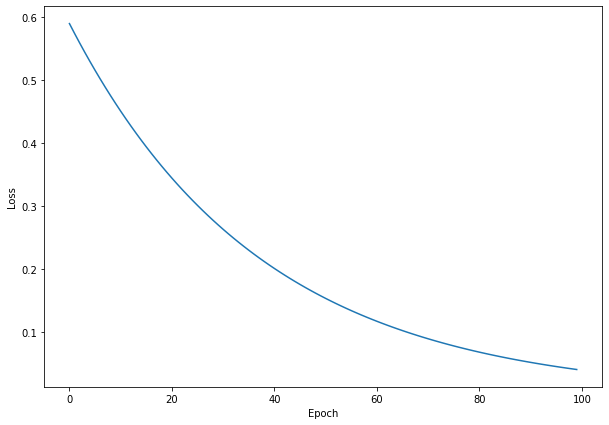

In [20]:
import matplotlib.pyplot as plt


print('손실값 시각화')
print()

plt.figure( figsize = (10, 7))

loss = history.history['loss']
plt.plot(loss)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()
plt.close()

손실값 시각화



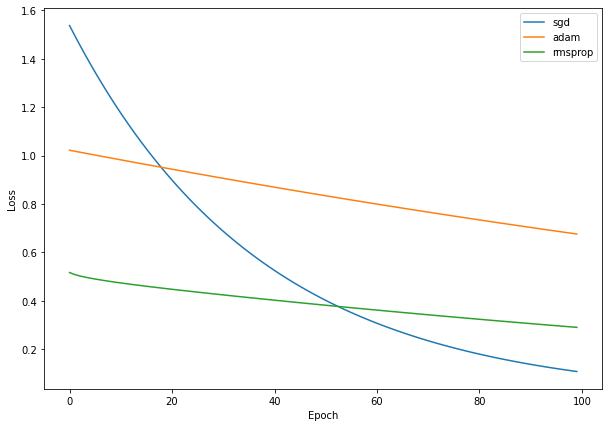

In [22]:
model = Sequential()
model.add( Dense(units = 3 , input_shape = (1,) ) )

model02 = clone_model(model) 

model03  = clone_model(model)

model.compile(loss = 'mse'   , optimizer = 'sgd')
model02.compile(loss = 'mse' , optimizer = 'Adam')
model03.compile(loss = 'mse' , optimizer = 'RMSprop')

history   = model.fit([1] , [[0, 1, 0]]   , epochs = 100 , verbose = 0)
history02 = model02.fit([1] , [[0, 1, 0]] , epochs = 100 , verbose = 0)
history03 = model03.fit([1] , [[0, 1, 0]] , epochs = 100 , verbose = 0)

print('손실값 시각화')
print()

plt.figure( figsize = (10, 7))

loss   = history.history['loss']
loss02 = history02.history['loss']
loss03 = history03.history['loss']

plt.plot(loss   , label='sgd')
plt.plot(loss02 , label='adam')
plt.plot(loss03 , label='rmsprop')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='best')
plt.show()
plt.close()




In [23]:
print('AND연산자 로직 연습')
print()


AND연산자 로직 연습



In [35]:
print('데이터 준비') 
X_train = [[0,0] , [0,1] , [1,0] , [1,1]]
y_train = [[0] , [0] , [0] , [1]] 

데이터 준비


In [58]:
print('모델 구성') 

# model = Sequential() 

# model.add( Dense(units = 3 , input_shape=(2,) , activation = 'relu') )
# model.add( Dense(units = 1 ) )

# model.add( Dense(units = 3 , input_shape=[2] ) )
# model.add( Activation('relu')) 
# model.add( Dense(units = 1 ) )

input_layer  = InputLayer(input_shape=(2,)) 
hidden_layer = Dense(units = 3 , activation = 'relu')
output_layer = Dense(units = 1)

# model.add(input_layer)
# model.add(hidden_layer)
# model.add(output_layer)

model = Sequential([
  input_layer  , 
  hidden_layer , 
  output_layer                    
]) 


모델 구성


In [54]:
print('컴파일')

model.compile(loss = 'mse' , 
              optimizer = 'Adam') 

컴파일


In [55]:
print('훈련')

pred_before_training = model.predict(X_train) 
print(pred_before_training)
print()
history = model.fit(X_train , y_train , epochs = 1000 , verbose = 0 ) 
pred_after_training = model.predict(X_train) 
print(pred_after_training)


훈련
[[ 0.        ]
 [ 0.33637086]
 [-0.5460635 ]
 [-0.57153606]]

[[-0.07842392]
 [ 0.19985685]
 [ 0.11712715]
 [ 0.78920704]]


손실값 시각화



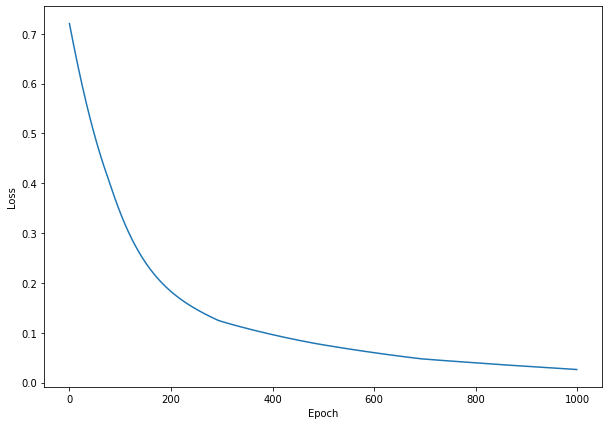

In [56]:
print('손실값 시각화')
print()

plt.figure( figsize = (10, 7))

loss = history.history['loss']
plt.plot(loss)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()
plt.close()

훈련결과 시각화



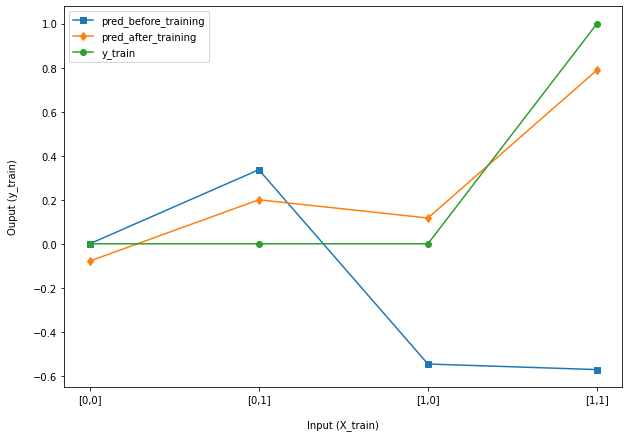

In [59]:
print('훈련결과 시각화')
print()

plt.figure( figsize = (10, 7))

plt.plot(pred_before_training , 's-', label = 'pred_before_training' )
plt.plot(pred_after_training  , 'd-', label = 'pred_after_training'  )
plt.plot(y_train              , 'o-', label = 'y_train' )

plt.xlabel('Input (X_train)' , labelpad = 15)
plt.ylabel('Ouput (y_train)' , labelpad = 15)

plt.xticks(np.arange(4) , labels = ['[0,0]', '[0,1]', '[1,0]' , '[1,1]'])
plt.legend()
plt.show()
plt.close()

In [61]:
print('Multi Layer Perceptron and Regression - ')
print('회귀 - 손실함수(loss function) , 평가지표(metric) - 평균제곱오차(mse) , 옵티마이저(sgd)')

Multi Layer Perceptron and Regression - 
회귀 - 손실함수(loss function) , 평가지표(metric) - 평균제곱오차(mse) , 옵티마이저(sgd)


In [208]:
from tensorflow.keras.datasets import boston_housing , mnist
from tensorflow.keras.models   import Sequential , clone_model , Model
from tensorflow.keras.layers   import Dense , Activation , InputLayer , Flatten , Input
from tensorflow.keras          import optimizers  
from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt


In [74]:
(X_train , y_train), (X_test , y_test) = boston_housing.load_data()
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

In [75]:
boston_model = Sequential()

In [79]:
# boston_model.add( Dense(units = 10 , input_shape = (13,) ))
# boston_model.add( Activation('sigmoid') ) 

# boston_model.add( Dense(units = 10))
# boston_model.add( Activation('sigmoid') ) 

# boston_model.add( Dense(units = 10))
# boston_model.add( Activation('sigmoid') ) 

# boston_model.add( Dense(units = 1))

boston_model.add( Dense(units = 10 , input_shape = (13,) , activation = 'sigmoid'))
boston_model.add( Dense(units = 10 , activation = 'sigmoid'))
boston_model.add( Dense(units = 10 , activation = 'sigmoid' ))
boston_model.add( Dense(units = 1))

opt = optimizers.SGD(lr = 0.001)

boston_model.compile(optimizer = opt , 
                     loss      = 'mean_squared_error' , 
                     metrics   = ['mse']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
boston_model.fit(X_train , y_train , batch_size = 50 , epochs = 100 , verbose = 1)

In [ ]:
boston_model.summary()

In [83]:
boston_model_eval = boston_model.evaluate(X_test , y_test) 
boston_model_eval

4/4 [==============================] - 0s 5ms/step - loss: 83.6215 - mse: 83.6215


[83.62152099609375, 83.62152099609375]

In [86]:
print('모델의 평가 지표 이름 - ')
boston_model.metrics_names

모델의 평가 지표 이름 - 


['loss', 'mse']

In [85]:
print('loss - ' , boston_model_eval[0] )
print('mse  - ' , boston_model_eval[1] )

loss -  83.62152099609375
mse  -  83.62152099609375


In [87]:
print('Multi Layer Perceptron and Regression - ')
print('분류 - 손실함수(loss function - binary_crossentropy)  , 평가지표(metric) - 정확도(accuracy) , 옵티마이저(sgd)')

Multi Layer Perceptron and Regression - 
분류 - 손실함수(loss function - binary_crossentropy)  , 평가지표(metric) - 정확도(accuracy) , 옵티마이저(sgd)


In [99]:
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [100]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , 
                                                      cancer.target , 
                                                      test_size = 0.2 ,
                                                      random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
cancer_model = Sequential()

cancer_model.add( Dense(units = 10 , input_shape = (30,) , activation = 'sigmoid'))
cancer_model.add( Dense(units = 10 , activation = 'sigmoid'))
cancer_model.add( Dense(units = 10 , activation = 'sigmoid' ))
cancer_model.add( Dense(units = 1  , activation = 'sigmoid'))

opt = optimizers.SGD(lr = 0.001)

cancer_model.compile(optimizer = opt , 
                     loss      = 'binary_crossentropy' , 
                     metrics   = ['accuracy']) 

In [ ]:
cancer_model.summary()

In [ ]:
cancer_model_history = cancer_model.fit(X_train , y_train , batch_size = 50 , epochs = 100 , verbose = 1)

In [ ]:
cancer_model_history.history

In [112]:
cancer_model_eval = cancer_model.evaluate(X_test , y_test)
cancer_model_eval

4/4 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5702


[0.6733992695808411, 0.5701754093170166]

In [110]:
print('모델의 평가 지표 이름 - ')
cancer_model.metrics_names

모델의 평가 지표 이름 - 


['loss', 'accuracy']

In [113]:
print('loss     - ' , cancer_model_eval[0] )
print('accuracy - ' , cancer_model_eval[1] )

loss     -  0.6733992695808411
accuracy -  0.5701754093170166


In [162]:
print('분류 - 다중(mnist)')
(X_train , y_train), (X_test , y_test) = mnist.load_data()
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)


분류 - 다중(mnist)


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

feature 28 * 28



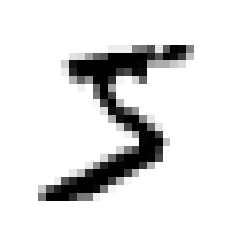

In [163]:
print('feature 28 * 28')
print()

plt.imshow(X_train[0] , cmap = plt.cm.binary)

plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [164]:
print('행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - ')
print('1차원의 벡터로 변환 - ')
print('reshape 28 * 28 -> 784') 


행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - 
1차원의 벡터로 변환 - 
reshape 28 * 28 -> 784


In [165]:
X_train = X_train.reshape( X_train.shape[0] , -1)

In [166]:
X_train.shape

(60000, 784)

In [167]:
X_test = X_test.reshape( X_test.shape[0] , -1)

In [168]:
X_test.shape

(10000, 784)

In [169]:
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)

(((60000, 784), (60000,)), ((10000, 784), (10000,)))

In [170]:
print('target - ')
print('one-hot-encoding - ') 
print()
for idx in range(10) :
  print(y_train[idx])

target - 
one-hot-encoding - 

5
0
4
1
9
2
1
3
1
4


In [171]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [172]:
y_train.shape , y_test.shape

((60000, 10), (10000, 10))

In [174]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [176]:
for idx in range(10) :
  print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [182]:
mnist_model = Sequential()

mnist_model.add( Dense(units = 50 , input_shape = (784,) , activation = 'sigmoid'))
mnist_model.add( Dense(units = 50 , activation = 'sigmoid'))
mnist_model.add( Dense(units = 50 , activation = 'sigmoid' ))
mnist_model.add( Dense(units = 50 , activation = 'sigmoid' ))

mnist_model.add( Dense(units = 10  , activation = 'softmax'))

opt = optimizers.SGD(lr = 0.001)

mnist_model.compile(optimizer = opt , 
                     loss      = 'categorical_crossentropy' , 
                     metrics   = ['accuracy']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
mnist_model.summary()

In [ ]:
mnist_model_history = mnist_model.fit(X_train , y_train , batch_size = 300 , epochs = 100 , verbose = 1 , 
                                      validation_split = 0.3)

In [181]:
mnist_model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

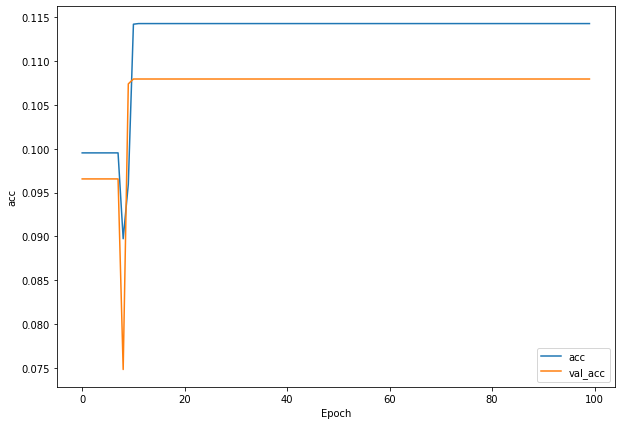

In [185]:
plt.figure( figsize = (10, 7))

accuracy     = mnist_model_history.history['accuracy']
val_accuracy = mnist_model_history.history['val_accuracy']

plt.plot(accuracy , label = 'acc')
plt.plot(val_accuracy , label = 'val_acc')

plt.xlabel('Epoch')
plt.ylabel('acc')

plt.legend(loc='best')
plt.show()
plt.close()

In [186]:
mnist_model.evaluate(X_test , y_test)

313/313 [==============================] - 3s 6ms/step - loss: 2.5256 - accuracy: 0.1135


[2.525604486465454, 0.11349999904632568]

In [187]:
print('case02 - ')
print('분류 - 다중(mnist)')
(X_train , y_train), (X_test , y_test) = mnist.load_data()
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)


case02 - 
분류 - 다중(mnist)


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [189]:
print('데이터 전처리 - 0 ~ 1.0 ')
X_train , X_test = X_train/255.0 , X_test/255.0
 

데이터 전처리 - 0 ~ 1.0 


In [193]:
mnist_model = Sequential()

mnist_model.add( Flatten(input_shape = (28 , 28)))

mnist_model.add( Dense(units = 512 , activation = 'sigmoid'))

mnist_model.add( Dense(units = 10  , activation = 'softmax'))

# opt = optimizers.SGD(lr = 0.001)

mnist_model.compile(optimizer  = 'adam' , 
                     loss      = 'sparse_categorical_crossentropy' , 
                     metrics   = ['accuracy']) 

In [194]:
mnist_model.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.9044
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1718 - accuracy: 0.9499
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9824


In [195]:
print('정확도 평가 - ')
mnist_model.evaluate(X_test , y_test)

정확도 평가 - 
313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9781


[0.07247545570135117, 0.9781000018119812]

In [ ]:
print('에포크에 따른 정확도와 손실 시각화 - ')

loss , accuracy = [] , []
for idx in range(10) :
  mnist_model.fit(X_train , y_train, epochs = 1 )
  loss.append(mnist_model.evaluate(X_test , y_test)[0])
  accuracy.append(mnist_model.evaluate(X_test , y_test)[1])

print(accuracy)

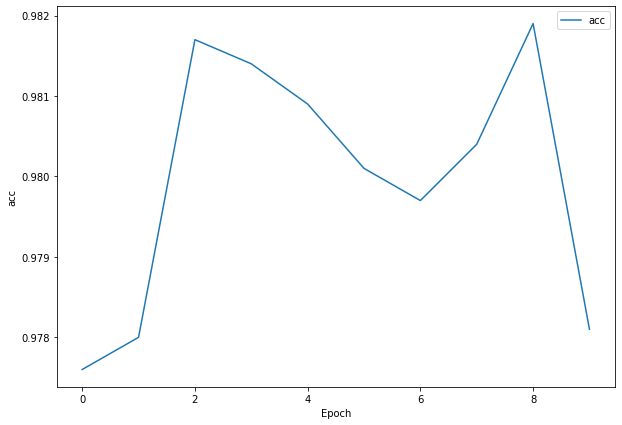

In [201]:
accuracy
loss

plt.figure( figsize = (10, 7))


plt.plot(accuracy , label = 'acc')

plt.xlabel('Epoch')
plt.ylabel('acc')

plt.legend(loc='best')
plt.show()
plt.close()

In [202]:
print('case03 - 함수형 API')

print('분류 - 다중(mnist)')
(X_train , y_train), (X_test , y_test) = mnist.load_data()
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)

X_train = X_train.reshape( X_train.shape[0] , -1)
X_test = X_test.reshape( X_test.shape[0] , -1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

case03 - 함수형 API
분류 - 다중(mnist)


In [203]:
(X_train.shape , y_train.shape), (X_test.shape , y_test.shape)

(((60000, 784), (60000, 10)), ((10000, 784), (10000, 10)))

In [ ]:
input_layer = Input(shape=(784, ) , name = 'input') 

hidden_layer01 = Dense(512 , activation = 'relu' , name='hidden01')(input_layer)
hidden_layer02 = Dense(128 , activation = 'relu' , name='hidden02')(hidden_layer01)
hidden_layer03 = Dense(64  , activation = 'relu' , name='hidden03')(hidden_layer02)
hidden_layer04 = Dense(32  , activation = 'relu' , name='hidden04')(hidden_layer03)

output_layer = Dense(10 , activation = 'softmax' , name = 'output')(hidden_layer04)

mnist_model = Model(inputs=[input_layer] , outputs = [output_layer])
mnist_model.summary()


In [214]:
mnist_model.compile(optimizer  = 'adam' , 
                     loss      = 'categorical_crossentropy' , 
                     metrics   = ['accuracy']) 

In [ ]:
mnist_model_history = mnist_model.fit(X_train , y_train , batch_size = 300 , epochs = 50 , verbose = 1 , 
                                      validation_split = 0.3)

In [216]:
print('정확도 평가 - ')
mnist_model.evaluate(X_test , y_test)

정확도 평가 - 
313/313 [==============================] - 2s 5ms/step - loss: 0.2228 - accuracy: 0.9709


[0.22283034026622772, 0.9708999991416931]